In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

trump_dataset = pd.read_csv('hashtag_donaldtrump.csv', encoding='latin_1', lineterminator='\n')
biden_dataset = pd.read_csv('hashtag_joebiden.csv', encoding='latin_1', lineterminator='\n')

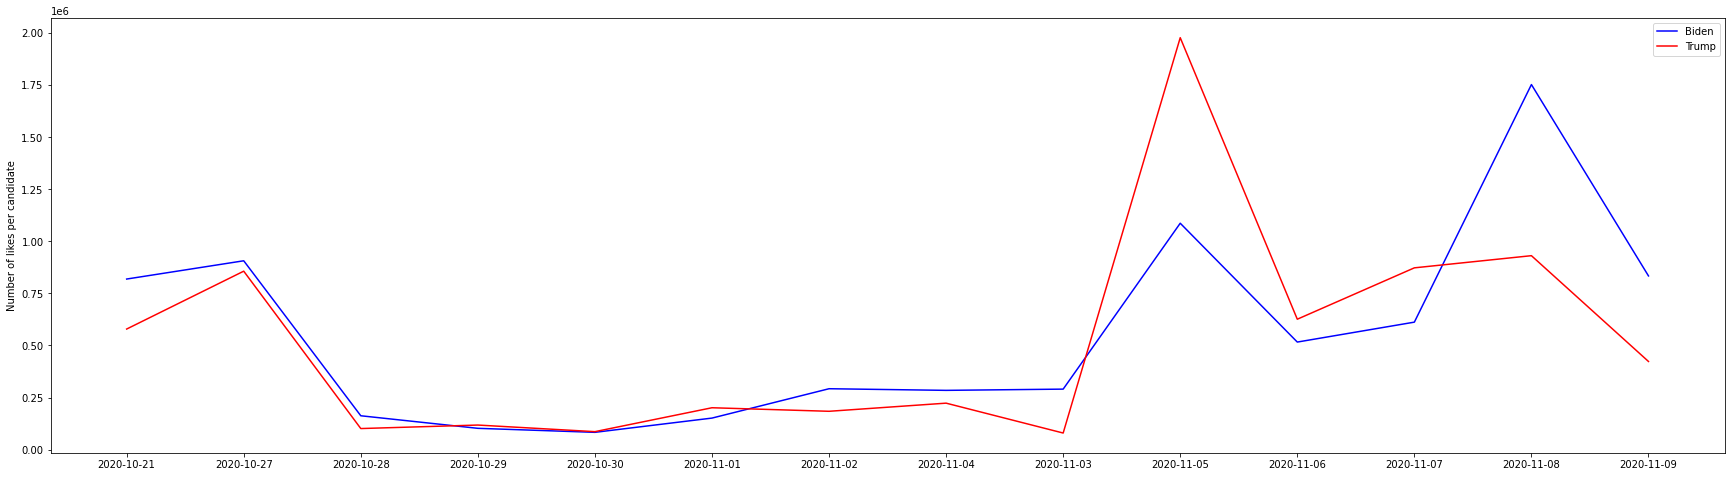

In [2]:
likes_trump = []
likes_per_day_trump = {}

likes_biden = []
likes_per_day_biden = {}

for index, row in trump_dataset.iterrows():
    likes_trump.append({"date": row['collected_at'].split()[0], "likes": row['likes']})
for index, row in biden_dataset.iterrows():
    likes_biden.append({"date": row['collected_at'].split()[0], "likes": row['likes']})

for like_trump in likes_trump:
    if like_trump["date"] in likes_per_day_trump:
        likes_per_day_trump[like_trump["date"]] += like_trump["likes"]
    else:
        likes_per_day_trump[like_trump["date"]] = like_trump["likes"]

for like_biden in likes_biden:
    if like_biden["date"] in likes_per_day_biden:
        likes_per_day_biden[like_biden["date"]] += like_biden["likes"]
    else:
        likes_per_day_biden[like_biden["date"]] = like_biden["likes"]

plt.figure(figsize=(30,8))

x_pos = np.arange(len(likes_per_day_trump))

plt.plot([like for like in likes_per_day_biden.values()], label="Biden", color="blue")
plt.plot([like for like in likes_per_day_trump.values()], label="Trump", color="red")

plt.xticks(x_pos, [key for key in likes_per_day_trump])

plt.ylabel('Number of likes per candidate')
plt.legend()
plt.show()
